In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import klib as klb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor,NearestCentroid
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./Quote-Equity-TATASTEEL-EQ-24-03-2021-to-24-03-2023.csv')

In [3]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,23-Mar-2023,EQ,104.40,105.50,104.35,104.80,105.00,104.90,105.06,"1,386.70",95.00,20913844,"2,197,143,347.90",114789
1,22-Mar-2023,EQ,104.75,105.95,104.40,104.75,104.95,104.80,105.21,"1,386.70",95.00,25891259,"2,724,080,059.55",105023
2,21-Mar-2023,EQ,105.10,105.40,104.30,104.50,104.80,104.75,104.71,"1,386.70",95.00,26434897,"2,768,091,153.40",142994
3,20-Mar-2023,EQ,106.10,106.45,103.85,107.00,104.50,104.50,104.71,"1,386.70",95.00,41569640,"4,352,603,949.85",182679
4,17-Mar-2023,EQ,106.45,107.35,105.00,105.05,107.15,107.00,106.25,"1,386.70",95.00,48962238,"5,202,472,538.40",165069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,31-Mar-2021,EQ,794.00,823.50,790.10,800.00,818.40,811.85,811.88,823.50,250.85,28044585,"22,768,892,122.25",313254
493,30-Mar-2021,EQ,780.00,810.00,777.90,766.85,799.50,800.00,797.66,810.00,250.85,28480338,"22,717,632,763.75",368821
494,26-Mar-2021,EQ,730.40,774.90,725.20,723.15,765.25,766.85,757.30,782.50,250.85,42912247,"32,497,556,832.30",501678
495,25-Mar-2021,EQ,710.10,730.70,688.35,702.80,722.95,723.15,712.97,782.50,250.85,36722400,"26,182,028,255.75",413129


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           497 non-null    object
 1   series         497 non-null    object
 2   OPEN           497 non-null    object
 3   HIGH           497 non-null    object
 4   LOW            497 non-null    object
 5   PREV. CLOSE    497 non-null    object
 6   ltp            497 non-null    object
 7   close          497 non-null    object
 8   vwap           497 non-null    object
 9   52W H          497 non-null    object
 10  52W L          497 non-null    object
 11  VOLUME         497 non-null    int64 
 12  VALUE          497 non-null    object
 13  No of trades   497 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 54.5+ KB


In [5]:
df.rename(columns={'Date ': 'Date'},inplace=True)
df.rename(columns={'series ':'series'},inplace=True)
df.rename(columns={'OPEN ':'OPEN'},inplace=True)
df.rename(columns={'HIGH ':'HIGH'},inplace=True)
df.rename(columns={'LOW ':'LOW'},inplace=True)
df.rename(columns={'PREV. CLOSE ':'PREV_CLOSE'},inplace=True)
df.rename(columns={'ltp ':'Last_Traded_Price'},inplace=True)
df.rename(columns={'close ':'close'},inplace=True)
df.rename(columns={'vwap ':'Volume_weighted_avg_price'},inplace=True)
df.rename(columns={'52W H ':'52W_H'},inplace=True)
df.rename(columns={'52W L ':'52W_L'},inplace=True)
df.rename(columns={'VOLUME ':'VOLUME'},inplace=True)
df.rename(columns={'VALUE ':'VALUE'},inplace=True)
df.rename(columns={'No of trades ':'No_of_trades'},inplace=True)

In [6]:
df.drop("series", axis=1, inplace=True)

In [7]:
df.isnull().mean()*100

Date                         0.0
OPEN                         0.0
HIGH                         0.0
LOW                          0.0
PREV_CLOSE                   0.0
Last_Traded_Price            0.0
close                        0.0
Volume_weighted_avg_price    0.0
52W_H                        0.0
52W_L                        0.0
VOLUME                       0.0
VALUE                        0.0
No_of_trades                 0.0
dtype: float64

In [8]:
df.columns

Index(['Date', 'OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'Last_Traded_Price',
       'close', 'Volume_weighted_avg_price', '52W_H', '52W_L', 'VOLUME',
       'VALUE', 'No_of_trades'],
      dtype='object')

In [15]:
df['OPEN'] = df['OPEN'].str.replace(',', '',)
df['HIGH'] = df['HIGH'].str.replace(',', '')
df['LOW'] = df['LOW'].str.replace(',', '')
df['PREV_CLOSE'] = df['PREV_CLOSE'].str.replace(',', '')
df['Last_Traded_Price'] = df['Last_Traded_Price'].str.replace(',', '')
df['close'] = df['close'].str.replace(',', '')
df['52W_H'] = df['52W_H'].str.replace(',', '')
df['Volume_weighted_avg_price'] = df['Volume_weighted_avg_price'].str.replace(',', '')
df['52W_L'] = df['52W_L'].str.replace(',', '')

In [20]:
df['OPEN'] = df['OPEN'].astype(float)
df['HIGH'] = df['HIGH'].astype(float)
df['LOW'] = df['LOW'].astype(float)
df['PREV_CLOSE'] = df['PREV_CLOSE'].astype(float)
df['Last_Traded_Price'] = df['Last_Traded_Price'].astype(float)
df['52W_H'] = df['52W_H'].astype(float)
df['Volume_weighted_avg_price'] = df['Volume_weighted_avg_price'].astype(float)
df['52W_L'] = df['52W_L'].astype(float)
df['close'] = df['close'].astype(float)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       497 non-null    object 
 1   OPEN                       497 non-null    float64
 2   HIGH                       497 non-null    float64
 3   LOW                        497 non-null    float64
 4   PREV_CLOSE                 497 non-null    float64
 5   Last_Traded_Price          497 non-null    float64
 6   close                      497 non-null    float64
 7   Volume_weighted_avg_price  497 non-null    float64
 8   52W_H                      497 non-null    float64
 9   52W_L                      497 non-null    float64
 10  VOLUME                     497 non-null    int64  
 11  VALUE                      497 non-null    object 
 12  No_of_trades               497 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 5

In [22]:
df.isnull().sum()

Date                         0
OPEN                         0
HIGH                         0
LOW                          0
PREV_CLOSE                   0
Last_Traded_Price            0
close                        0
Volume_weighted_avg_price    0
52W_H                        0
52W_L                        0
VOLUME                       0
VALUE                        0
No_of_trades                 0
dtype: int64

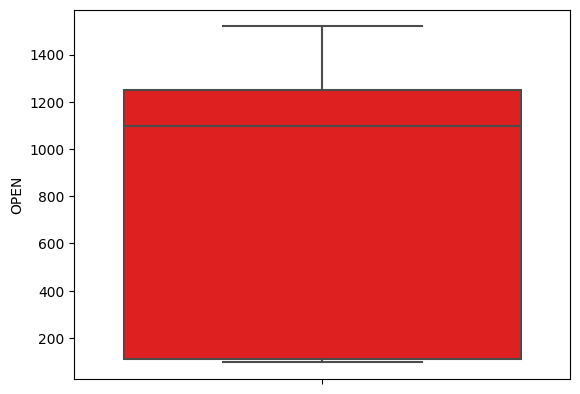

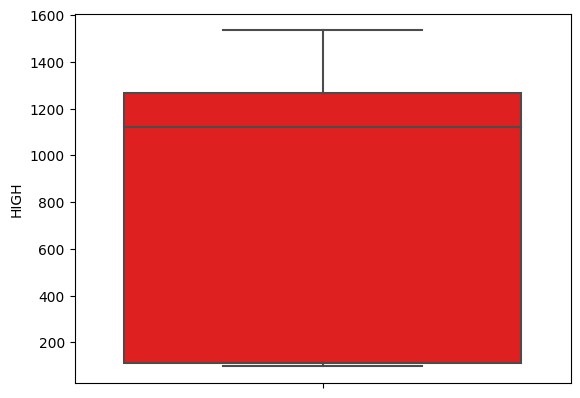

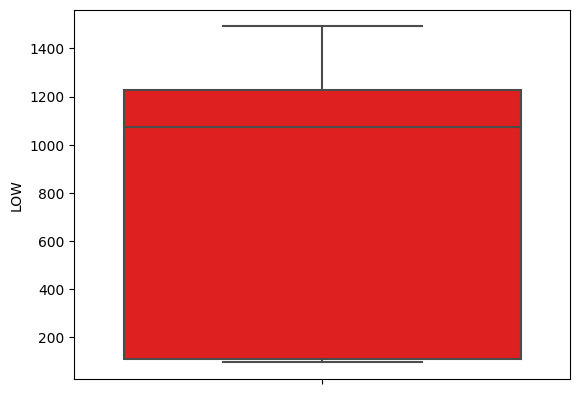

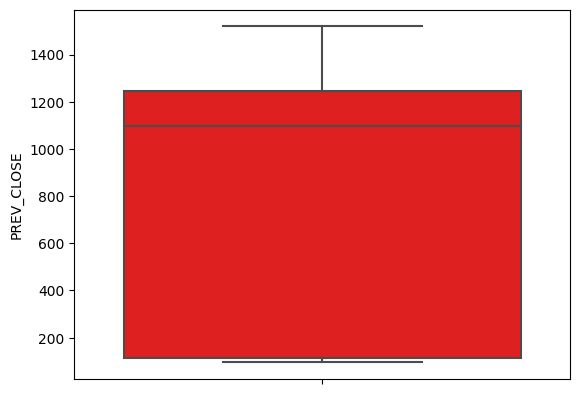

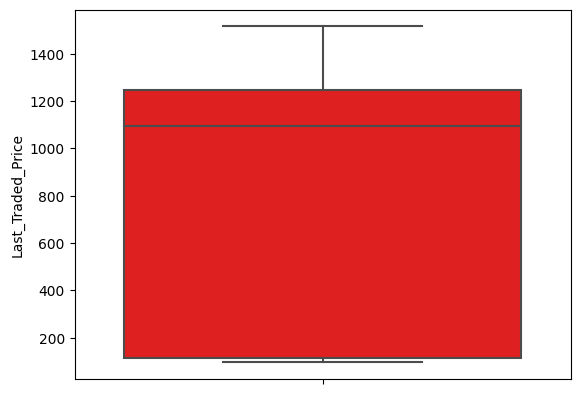

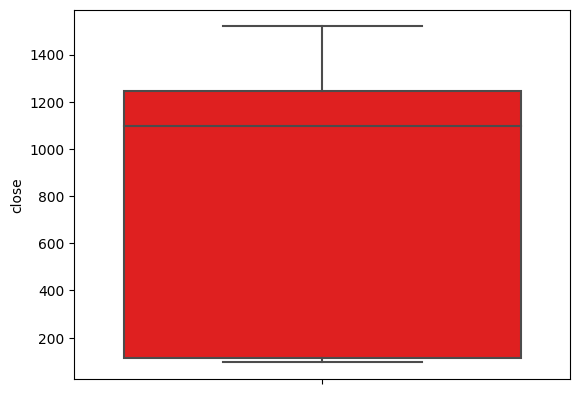

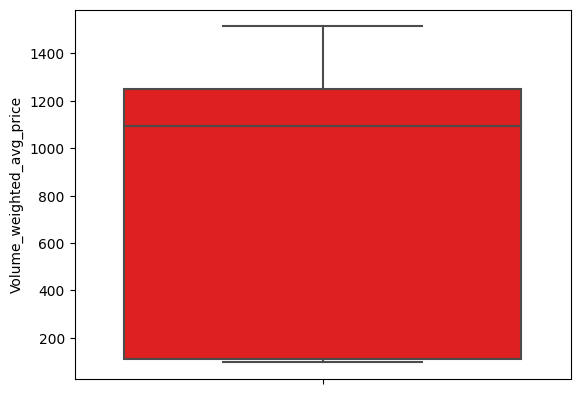

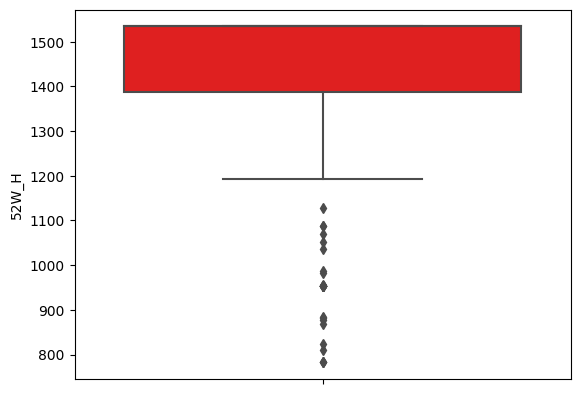

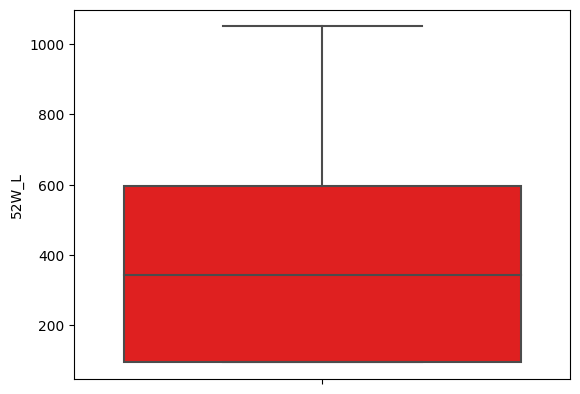

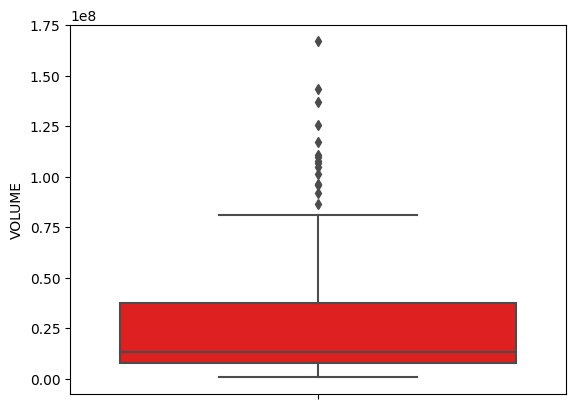

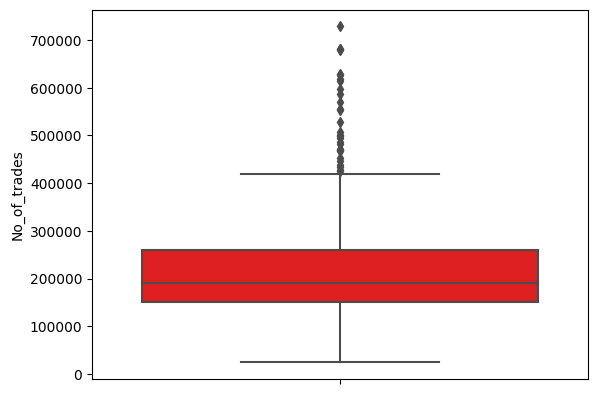

In [23]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='red')
        plt.show()

In [24]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [25]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

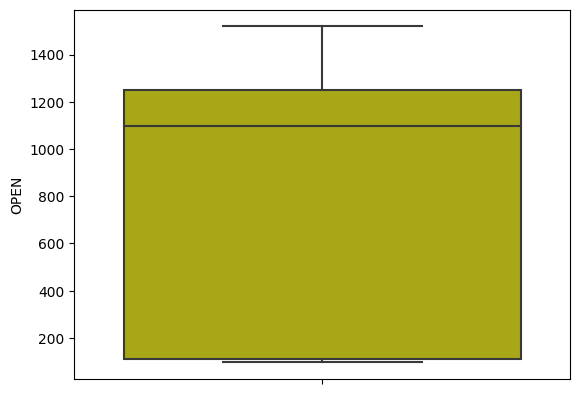

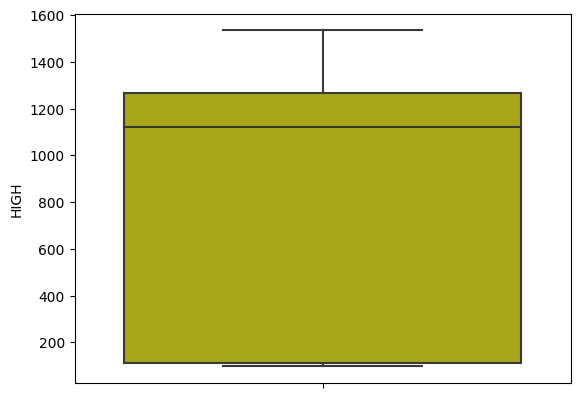

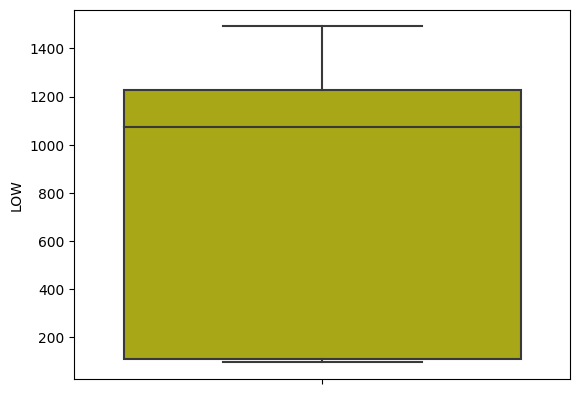

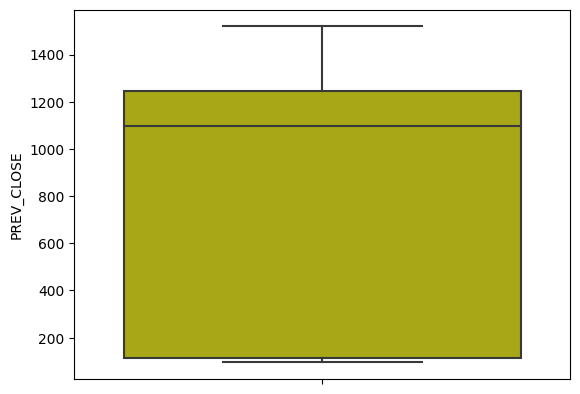

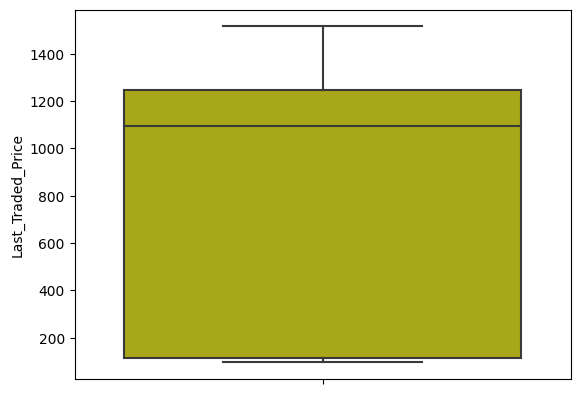

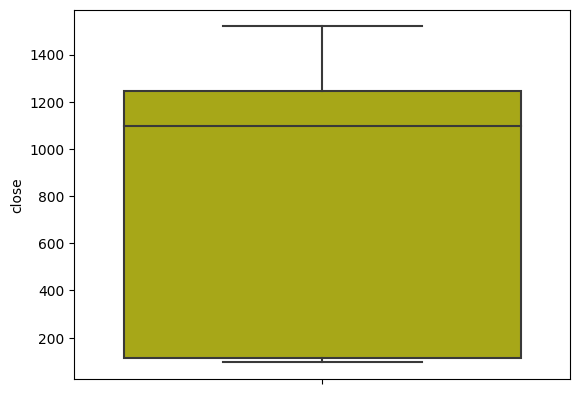

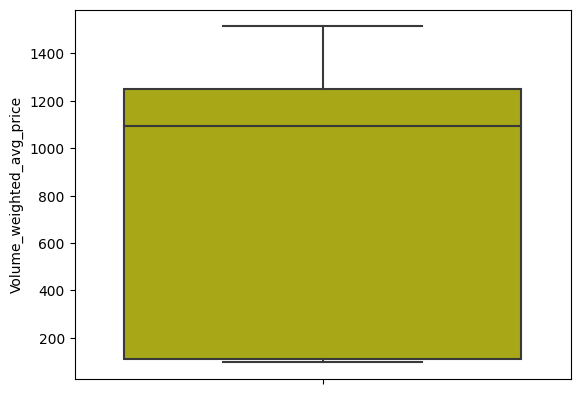

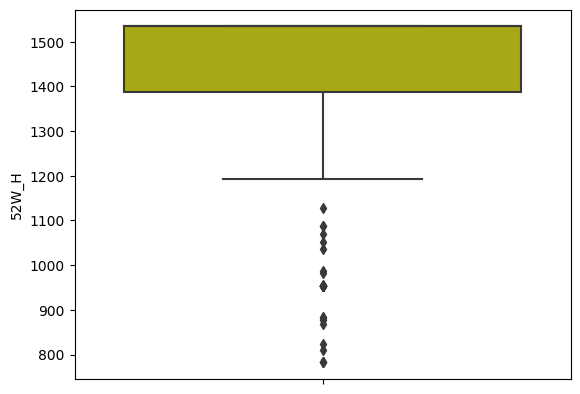

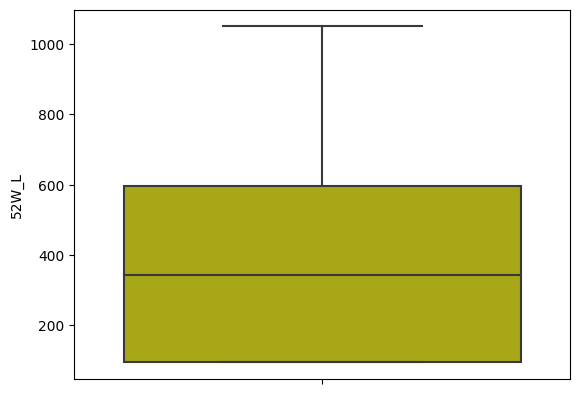

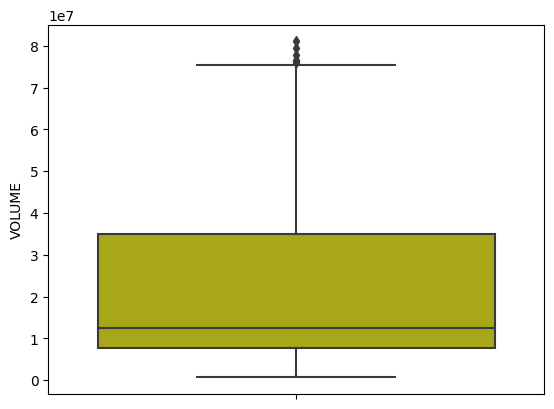

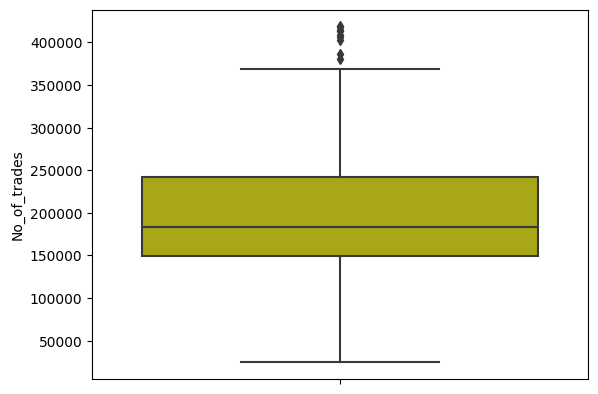

In [26]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='y')
        plt.show()

In [27]:
df.dropna(inplace=True)

In [28]:
df.isna().mean()

Date                         0.0
OPEN                         0.0
HIGH                         0.0
LOW                          0.0
PREV_CLOSE                   0.0
Last_Traded_Price            0.0
close                        0.0
Volume_weighted_avg_price    0.0
52W_H                        0.0
52W_L                        0.0
VOLUME                       0.0
VALUE                        0.0
No_of_trades                 0.0
dtype: float64

<AxesSubplot: >

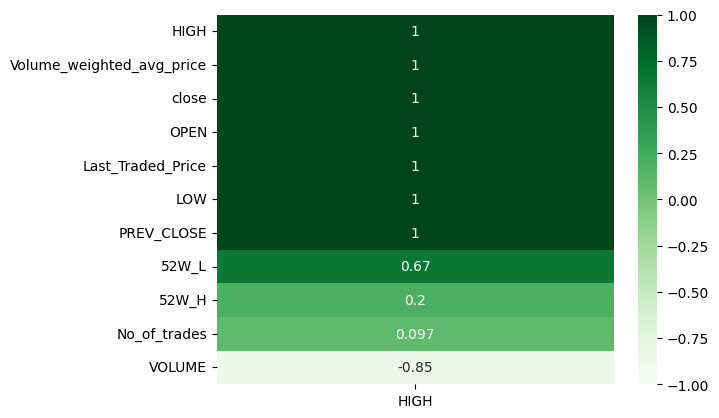

In [29]:
sns.heatmap(df.corr()[['HIGH']].sort_values(by='HIGH', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')

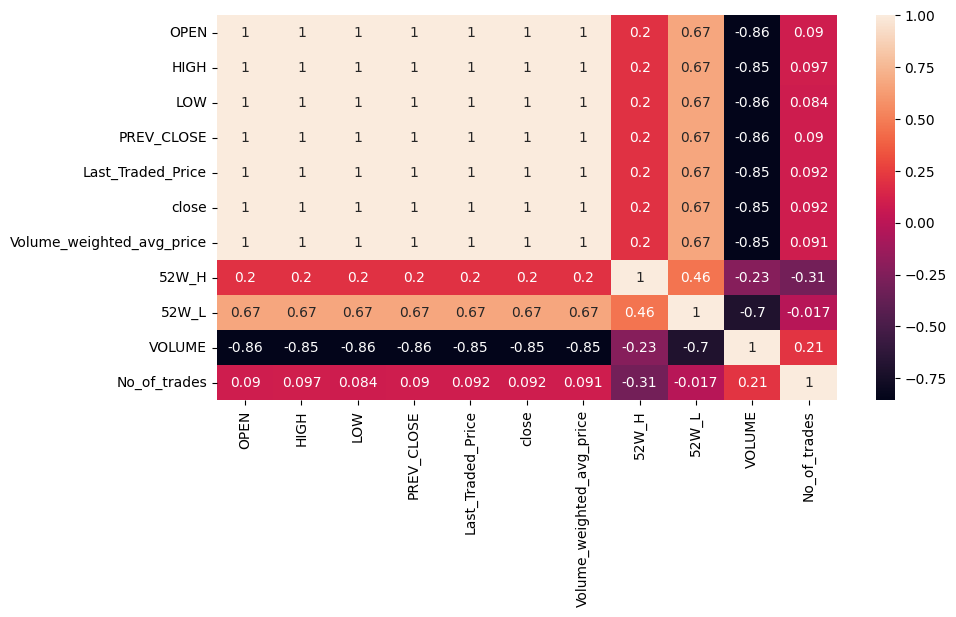

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [31]:
df.columns

Index(['Date', 'OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'Last_Traded_Price',
       'close', 'Volume_weighted_avg_price', '52W_H', '52W_L', 'VOLUME',
       'VALUE', 'No_of_trades'],
      dtype='object')

In [32]:
x=df[['OPEN',  'LOW', 'PREV_CLOSE', 'Last_Traded_Price',
       'close', 'Volume_weighted_avg_price',]].values
y=df[['HIGH']].values

In [33]:
sc=StandardScaler()

In [34]:
x=sc.fit_transform(x)

In [35]:
from sklearn.model_selection import cross_val_score
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'KneghborsRegressor':KNeighborsRegressor()
}

In [36]:
for name, model in models.items():
    scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('ss validaton model:{}'.format(name))
    rmse=np.sqrt(-scores)
    rmse_avarage=np.mean(rmse)
    print('AVARAGE RMSE:',rmse_avarage)
    print('*'*100)

ss validaton model:LinearRegression
AVARAGE RMSE: 2.969750923482433
****************************************************************************************************
ss validaton model:Lasso
AVARAGE RMSE: 7.1582509719083545
****************************************************************************************************
ss validaton model:Ridge
AVARAGE RMSE: 6.042397313520655
****************************************************************************************************
ss validaton model:GradientBoostingRegressor
AVARAGE RMSE: 9.435889164209982
****************************************************************************************************
ss validaton model:AdaBoostRegressor
AVARAGE RMSE: 14.390683687233231
****************************************************************************************************
ss validaton model:RandomForestRegressor
AVARAGE RMSE: 8.983701732027688
********************************************************************************************

In [37]:
LR=LinearRegression()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
LR.fit(x_train,y_train)

LinearRegression()

In [41]:
print("model trained with {}".format(LR))
training_score = LR.score(x_train, y_train)*100
testing_score = LR.score(x_test, y_test)*100
score = r2_score(y_test, LR.predict(x_test))*100
mae = mean_absolute_error(y_test, LR.predict(x_test))
mse = mean_squared_error(y_test, LR.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with LinearRegression()
r2score:  99.9962868350359
training_score:  99.99576610738367
testing_score:  99.9962868350359
mae:  2.15243195559716
mse:  10.250243193332734
rmse_test:  3.201600098908784


In [43]:
y_pred = LR.predict(x)

In [44]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,105.50,105.839061
1,105.95,106.087643
2,105.40,105.622838
3,106.45,106.392842
4,107.35,107.771862
...,...,...
453,868.90,855.536472
454,823.50,825.996698
455,810.00,807.612722
456,730.70,733.427876


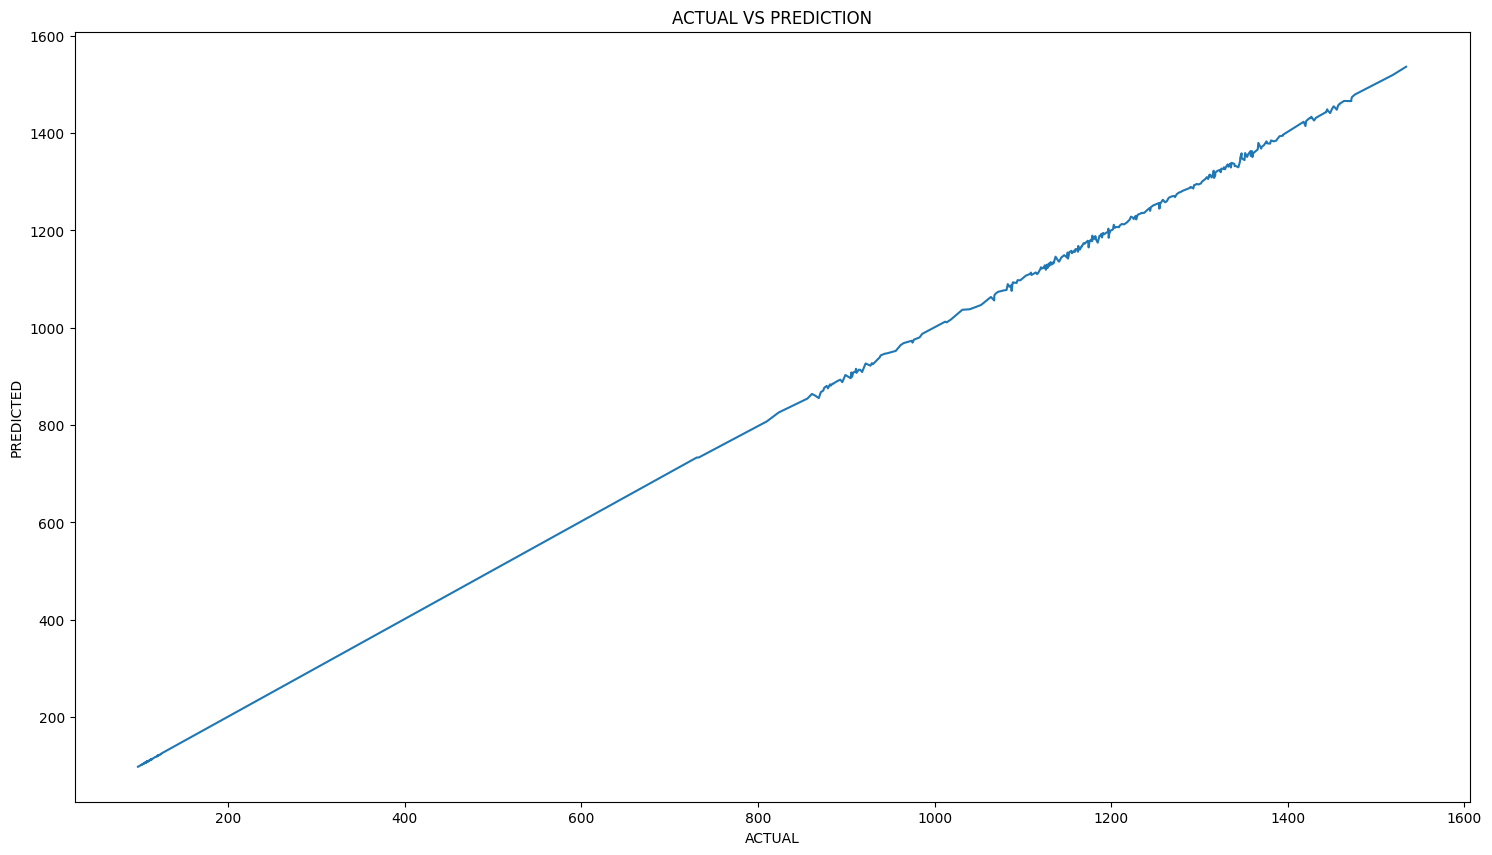

In [45]:
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()